In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv('587project_data.csv')
test_x = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
test_size = len(test_x)
df['CPU_Time'] = df['CPU_Time'].apply(lambda x: x/1000000)
df['GPU_Time'] = df['GPU_Time'].apply(lambda x: x/1000)
df['GPU_nsrd_Time'] = df['GPU_nsrd_Time'].apply(lambda x: x/1000)
pass

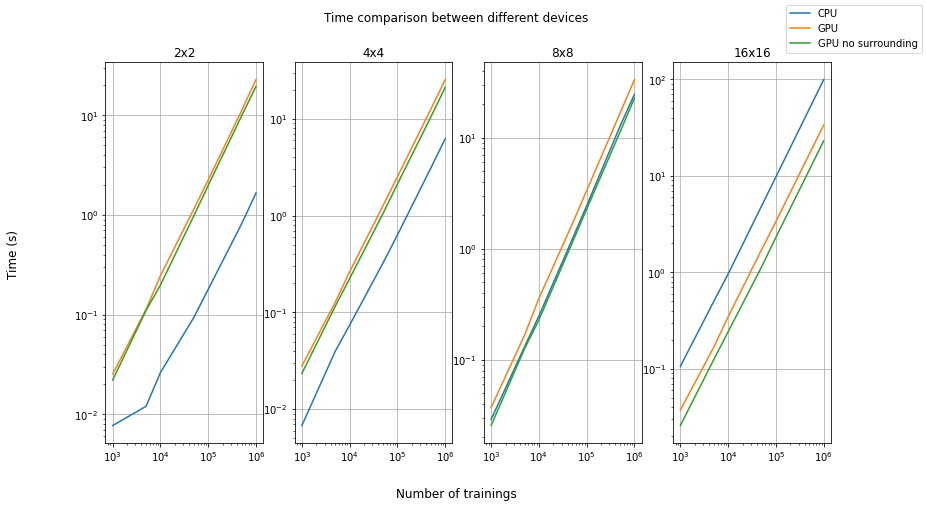

In [36]:
# CPU time, GPU time, GPU srd comparison

fig, ax = plt.subplots(1, 4, figsize=(13, 7))
fig.suptitle('Time comparison between different devices')
for i in range(4):
    start = i * test_size
    end = start + test_size
    ax[i].plot(test_x, df['CPU_Time'][start : end], label='CPU')
    ax[i].plot(test_x, df['GPU_Time'][start : end], label='GPU')
    ax[i].plot(test_x, df['GPU_nsrd_Time'][start : end], label='GPU no surrounding')
    ax[i].set_title(str(2**(i+1)) + 'x' + str(2**(i+1)))
    #ax[i].set_ylim(-0.1, 100)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].grid()
fig.supxlabel('Number of trainings')
fig.supylabel('Time (s)')
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels)
fig.savefig('time_comparison_training.png', dpi=300)

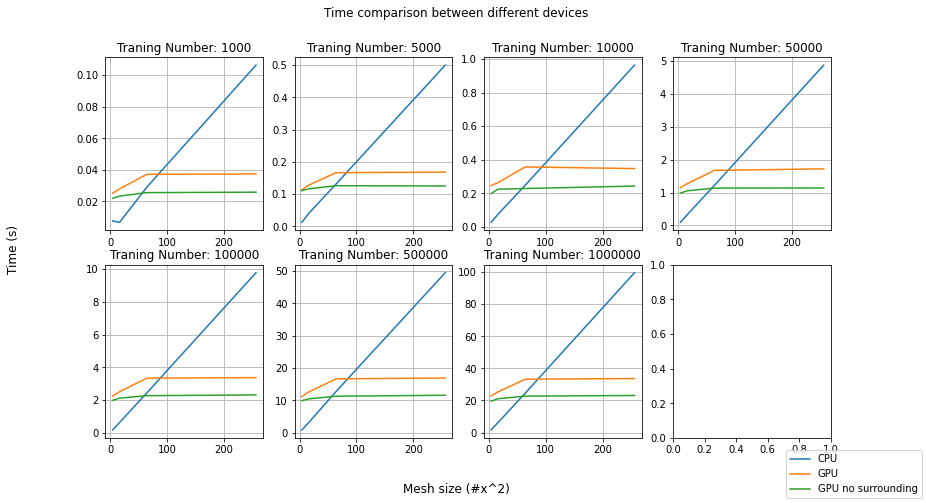

In [37]:
plt.close()
fig, ax = plt.subplots(2, 4, figsize=(13, 7))
fig.suptitle('Time comparison between different devices')

for i in range(test_size):
    cpu_time = [df['CPU_Time'][i + x * test_size] for x in range(4)]
    gpu_time = [df['GPU_Time'][i + x * test_size] for x in range(4)]
    gpu_nsrd_time = [df['GPU_nsrd_Time'][i + x * test_size] for x in range(4)]
    y = int(i / 4)
    x = i % 4
    ax[y, x].plot([4, 16, 64, 256], cpu_time, label='CPU')
    ax[y, x].plot([4, 16, 64, 256], gpu_time, label='GPU')
    ax[y, x].plot([4, 16, 64, 256], gpu_nsrd_time, label='GPU no surrounding')

    ax[y, x].set_title(str("Traning Number: " + str(test_x[i])))
    #ax[y, x].set_ylim(-0.1, 100)
    ax[y, x].grid()
fig.supxlabel('Mesh size (#x^2)')
fig.supylabel('Time (s)')
labels = ['CPU', 'GPU', 'GPU no surrounding']

lines = []
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    #labels.extend(Label)

fig.legend(lines, labels, loc='lower right')
fig.savefig('time_comparison_size.png', dpi=300)

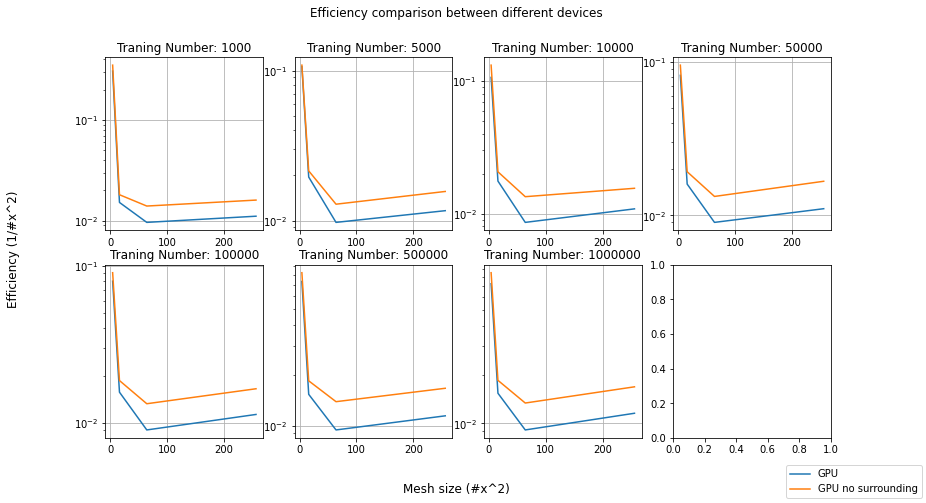

In [38]:
plt.close()
fig, ax = plt.subplots(2, 4, figsize=(13, 7))
fig.suptitle('Efficiency comparison between different devices')

for i in range(test_size):
    #cpu_time = [df['CPU_Time'][i + x * test_size] / (x+1)**4 for x in range(4)]
    gpu_time = [df['CPU_Time'][i + x * test_size] / df['GPU_Time'][i + x * test_size] / (x+1)**4 for x in range(4)]
    gpu_nsrd_time = [df['CPU_Time'][i + x * test_size] / df['GPU_nsrd_Time'][i + x * test_size] / (x+1)**4 for x in range(4)]
    y = int(i / 4)
    x = i % 4
    #ax[y, x].plot([4, 16, 64, 256], cpu_time, label='CPU')
    ax[y, x].plot([4, 16, 64, 256], gpu_time, label='GPU')
    ax[y, x].plot([4, 16, 64, 256], gpu_nsrd_time, label='GPU no surrounding')

    ax[y, x].set_title(str("Traning Number: " + str(test_x[i])))
    ax[y, x].set_yscale('log')
    #ax[y, x].set_ylim(-0.1, 100)
    ax[y, x].grid()
fig.supxlabel('Mesh size (#x^2)')
fig.supylabel('Efficiency (1/#x^2)')
#labels = ['CPU time', 'GPU time', 'GPU no surrounding time']
labels = ['GPU', 'GPU no surrounding']

lines = []
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    #labels.extend(Label)

fig.legend(lines, labels, loc='lower right')
fig.savefig('efficiency_comparison_size.png', dpi=300)

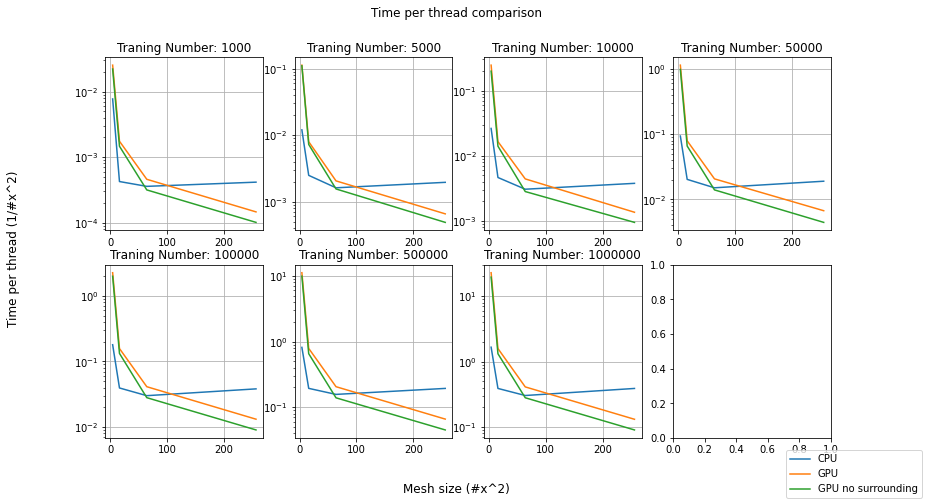

In [39]:
plt.close()
fig, ax = plt.subplots(2, 4, figsize=(13, 7))
fig.suptitle('Time per thread comparison')

for i in range(test_size):
    cpu_time = [df['CPU_Time'][i + x * test_size] / (x+1)**4 for x in range(4)]
    gpu_time = [df['GPU_Time'][i + x * test_size] / (x+1)**4 for x in range(4)]
    gpu_nsrd_time = [df['GPU_nsrd_Time'][i + x * test_size] / (x+1)**4 for x in range(4)]
    y = int(i / 4)
    x = i % 4
    ax[y, x].plot([4, 16, 64, 256], cpu_time, label='CPU')
    ax[y, x].plot([4, 16, 64, 256], gpu_time, label='GPU')
    ax[y, x].plot([4, 16, 64, 256], gpu_nsrd_time, label='GPU no surrounding')

    ax[y, x].set_title(str("Traning Number: " + str(test_x[i])))
    ax[y, x].set_yscale('log')
    #ax[y, x].set_ylim(-0.1, 100)
    ax[y, x].grid()
fig.supxlabel('Mesh size (#x^2)')
fig.supylabel('Time per thread (1/#x^2)')
labels = ['CPU', 'GPU', 'GPU no surrounding']

lines = []
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    #labels.extend(Label)

fig.legend(lines, labels, loc='lower right')
fig.savefig('efficiency_comparison_time.png', dpi=300)

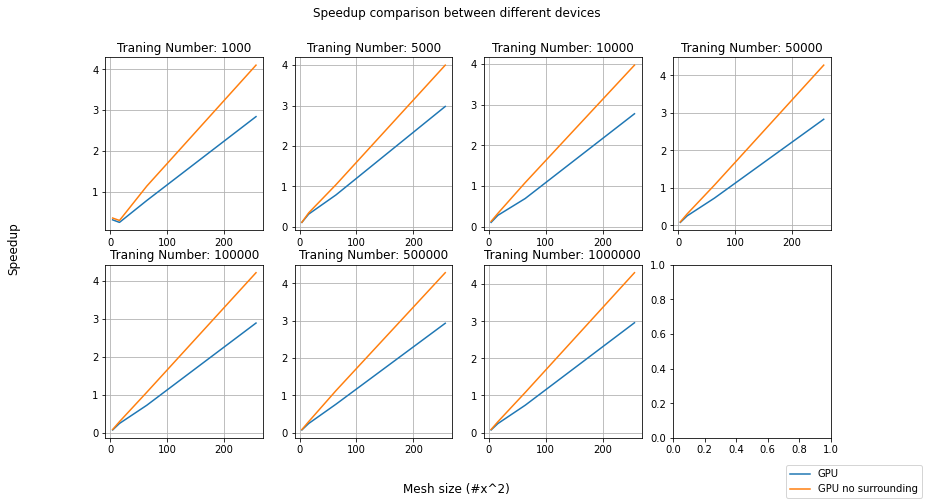

In [40]:
plt.close()
fig, ax = plt.subplots(2, 4, figsize=(13, 7))
fig.suptitle('Speedup comparison between different devices')

for i in range(test_size):
    #cpu_time = [df['CPU_Time'][i + x * test_size] / (x+1)**4 for x in range(4)]
    gpu_time = [df['CPU_Time'][i + x * test_size] / df['GPU_Time'][i + x * test_size] for x in range(4)]
    gpu_nsrd_time = [df['CPU_Time'][i + x * test_size] / df['GPU_nsrd_Time'][i + x * test_size] for x in range(4)]
    y = int(i / 4)
    x = i % 4
    #ax[y, x].plot([4, 16, 64, 256], cpu_time, label='CPU')
    ax[y, x].plot([4, 16, 64, 256], gpu_time, label='GPU')
    ax[y, x].plot([4, 16, 64, 256], gpu_nsrd_time, label='GPU no surrounding')

    ax[y, x].set_title(str("Traning Number: " + str(test_x[i])))
    #ax[y, x].set_yscale('log')
    #ax[y, x].set_ylim(-0.1, 100)
    ax[y, x].grid()
fig.supxlabel('Mesh size (#x^2)')
fig.supylabel('Speedup')
labels = ['GPU', 'GPU no surrounding']

lines = []
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    #labels.extend(Label)

fig.legend(lines, labels, loc='lower right')
fig.savefig('speedup_comparison.png', dpi=300)

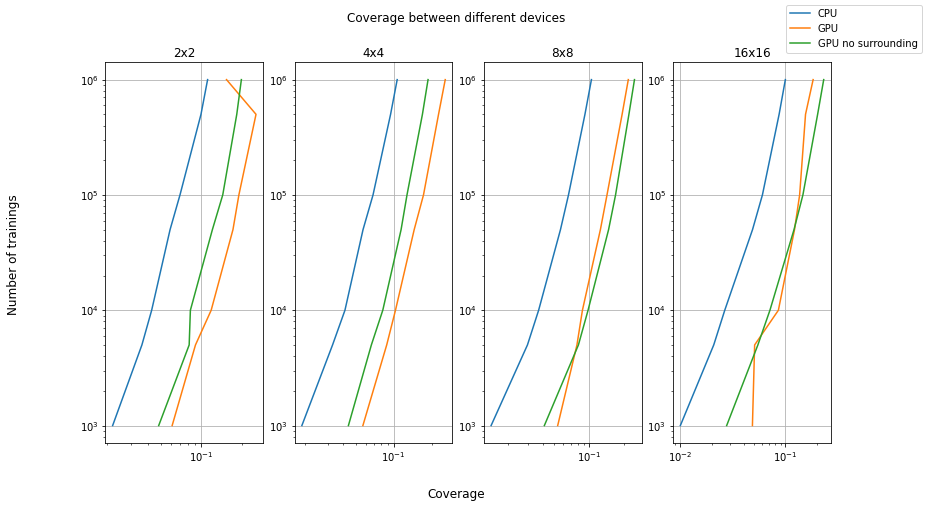

In [41]:
#coverage
plt.close()
fig, ax = plt.subplots(1, 4, figsize=(13, 7))
fig.suptitle('Coverage between different devices')
for i in range(4):
    start = i * test_size
    end = start + test_size
    ax[i].plot(df['CPU_Coverage'][start : end], test_x, label='CPU')
    ax[i].plot(df['GPU_Coverage'][start : end], test_x, label='GPU')
    ax[i].plot(df['GPU_nsrd_Coverage'][start : end], test_x, label='GPU no surrounding')
    ax[i].set_title(str(2**(i+1)) + 'x' + str(2**(i+1)))
    #ax[i].set_ylim(1, 1000000)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].grid()
fig.supxlabel('Coverage')
fig.supylabel('Number of trainings')
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels)
fig.savefig('coverage_comparison_training.png', dpi=300)

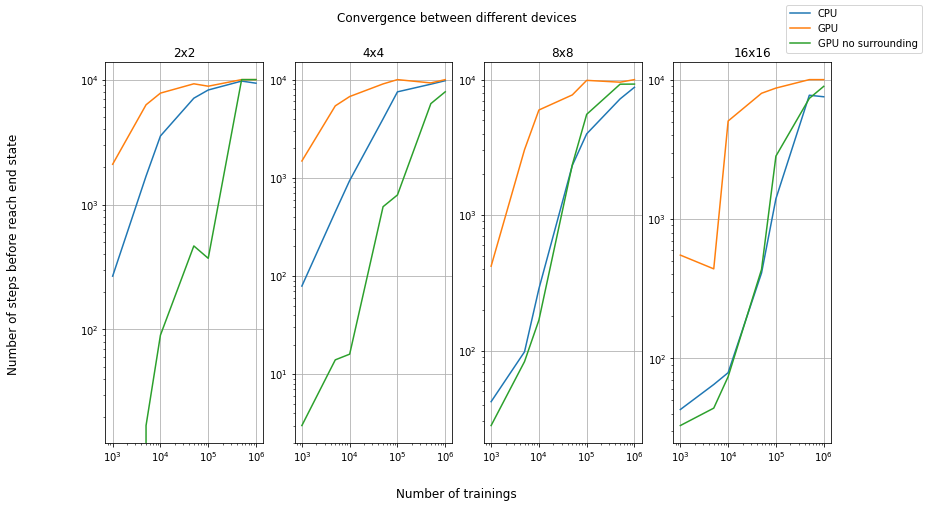

In [42]:
#convergence
plt.close()
fig, ax = plt.subplots(1, 4, figsize=(13, 7))
fig.suptitle('Convergence between different devices')
for i in range(4):
    start = i * test_size
    end = start + test_size
    ax[i].plot(test_x, df['CPU_Avg_f'][start : end], label='CPU')
    ax[i].plot(test_x, df['GPU_Avg_f'][start : end], label='GPU')
    ax[i].plot(test_x, df['GPU_nsrd_Avg_f'][start : end], label='GPU no surrounding')
    ax[i].set_title(str(2**(i+1)) + 'x' + str(2**(i+1)))
    #ax[i].set_ylim(1, 1000000)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].grid()
fig.supylabel('Number of steps before reach end state')
fig.supxlabel('Number of trainings')
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels)
fig.savefig('convergence_comparison_training.png', dpi=300)

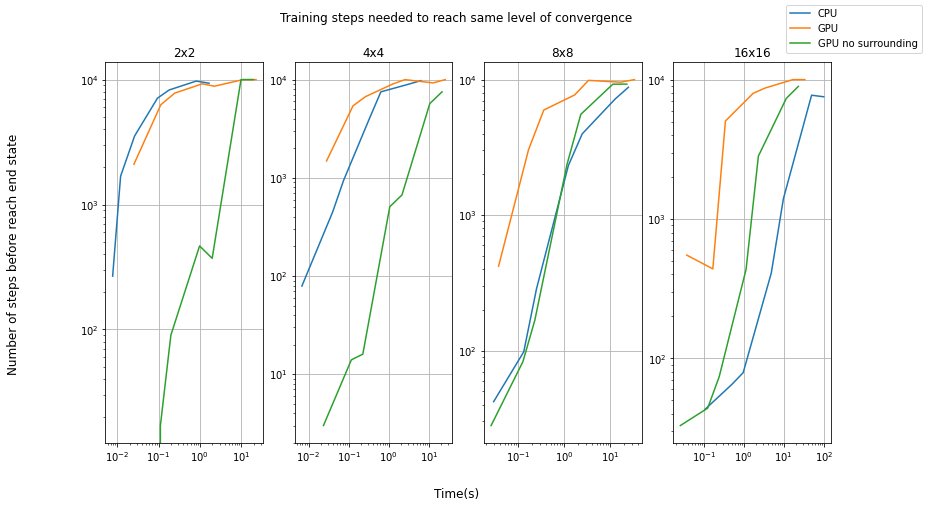

In [43]:
#convergence
plt.close()
fig, ax = plt.subplots(1, 4, figsize=(13, 7))
fig.suptitle('Training steps needed to reach same level of convergence')
for i in range(4):
    start = i * test_size
    end = start + test_size
    ax[i].plot(df['CPU_Time'][start : end], df['CPU_Avg_f'][start : end], label='CPU')
    ax[i].plot(df['GPU_Time'][start : end], df['GPU_Avg_f'][start : end], label='GPU')
    ax[i].plot(df['GPU_nsrd_Time'][start : end], df['GPU_nsrd_Avg_f'][start : end], label='GPU no surrounding')
    ax[i].set_title(str(2**(i+1)) + 'x' + str(2**(i+1)))
    #ax[i].set_ylim(1, 1000000)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].grid()
fig.supxlabel('Time(s)')
fig.supylabel('Number of steps before reach end state')
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels)
fig.savefig('convergence_comparison_time.png', dpi=300)

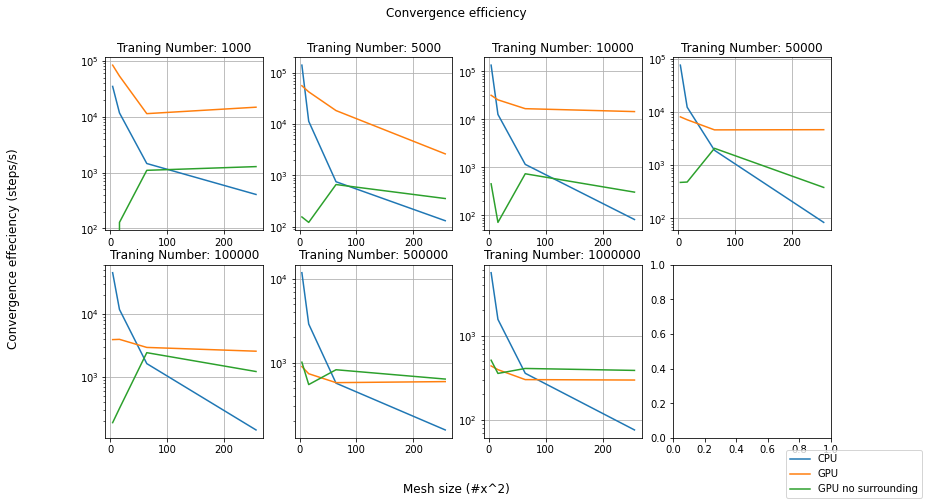

In [44]:
plt.close()
fig, ax = plt.subplots(2, 4, figsize=(13, 7))
fig.suptitle('Convergence efficiency')

for i in range(test_size):
    cpu_time = [df['CPU_Time'][i + x * test_size] for x in range(4)]
    gpu_time = [df['GPU_Time'][i + x * test_size] for x in range(4)]
    gpu_nsrd_time = [df['GPU_nsrd_Time'][i + x * test_size] for x in range(4)]
    cpu_conv = [df['CPU_Avg_f'][i + x * test_size] for x in range(4)]
    gpu_conv = [df['GPU_Avg_f'][i + x * test_size] for x in range(4)]
    gpu_nsrd_conv = [df['GPU_nsrd_Avg_f'][i + x * test_size] for x in range(4)]
    y = int(i / 4)
    x = i % 4
    ax[y, x].plot([4, 16, 64, 256], [cpu_conv[x]/cpu_time[x] for x in range(4)], label='CPU')
    ax[y, x].plot([4, 16, 64, 256], [gpu_conv[x]/gpu_time[x] for x in range(4)], label='GPU')
    ax[y, x].plot([4, 16, 64, 256], [gpu_nsrd_conv[x]/gpu_nsrd_time[x] for x in range(4)], label='GPU no surrounding')

    ax[y, x].set_title(str("Traning Number: " + str(test_x[i])))
    ax[y, x].set_yscale('log')
    #ax[y, x].set_ylim(-0.1, 100)
    ax[y, x].grid()
fig.supxlabel('Mesh size (#x^2)')
fig.supylabel('Convergence effeciency (steps/s)')
labels = ['CPU', 'GPU', 'GPU no surrounding']

lines = []
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    #labels.extend(Label)

fig.legend(lines, labels, loc='lower right')
fig.savefig('convergence_efficiency.png', dpi=300)

Text(0, 0.5, 'Length panelty')

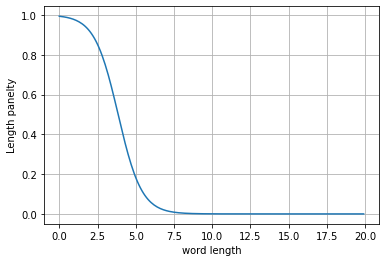

In [45]:
plt.close()

k_x = np.arange(0, 20, 0.1)
k_y = 1 / (1 + np.exp(-(- 1.3 * k_x + 5)))
plt.plot(k_x, k_y)
plt.grid()
plt.xlabel('word length')
plt.ylabel('Length panelty')
